In [1]:
import matplotlib.pyplot as plt
import numpy as np

from src.data import load_data

/home/dz819/early/early-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
'''
Oct24_16-33-35_doc-dz819 - CNN - decoyMNIST
Oct24_16-45-12_doc-dz819 - CNN - MNIST
Oct24_16-02-48_doc-dz819 - RN18 - pneu_text
Oct24_17-16-51_doc-dz819 - RN18 - pneu_text
Oct24_17-24-57_doc-dz819 - RN18 - pneu
Oct24_17-30-23_doc-dz819 - RN18 (exit 2nd) - pneu
'''

model_dir = "Oct24_17-24-57_doc-dz819"
model = "EarlyRN18"
dataset = "pneu"

early = np.load(f"earlyExp_{model}_{dataset}_{model_dir}.npy")
late = np.load(f"lateExp_{model}_{dataset}_{model_dir}.npy")



In [3]:
early.shape

(624, 3, 224, 224)

In [4]:
seed = 0
frac = 1.0
data_raw = load_data(data=dataset, split='test', seed=seed, frac=frac)

In [5]:
ent_early = np.load(f"earlyEnt_{model}_{dataset}_{model_dir}.npy")
ent_late = np.load(f"lateEnt_{model}_{dataset}_{model_dir}.npy")

<Figure size 640x480 with 0 Axes>

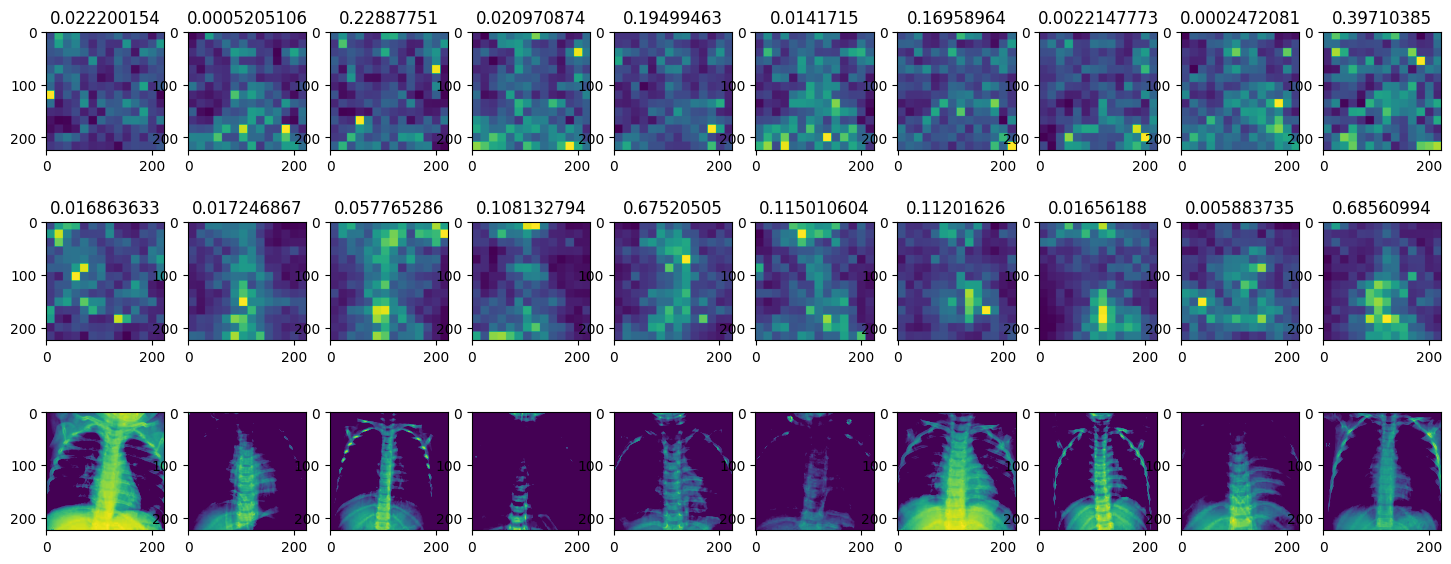

In [6]:
plt.figure()
fig, axs = plt.subplots(3,10, figsize=(18,7))

for i in range(10):
    axs[0][i].imshow(early[i].sum(axis=0))
    axs[0][i].set_title(ent_early[i])

    axs[1][i].imshow(late[i].sum(axis=0))
    axs[1][i].set_title(ent_late[i])

    axs[2][i].imshow(data_raw[i][0].sum(axis=0), vmin=0)

    # axs[2][i].imshow(data[i].sum(axis=0), vmin=0)



(array([  0.,   3.,   3.,   6.,  13.,  12.,  29., 380.,  69.,  37.,  36.,
         12.,  16.,   6.,   2.]),
 array([-0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,
         0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75]),
 <BarContainer object of 15 artists>)

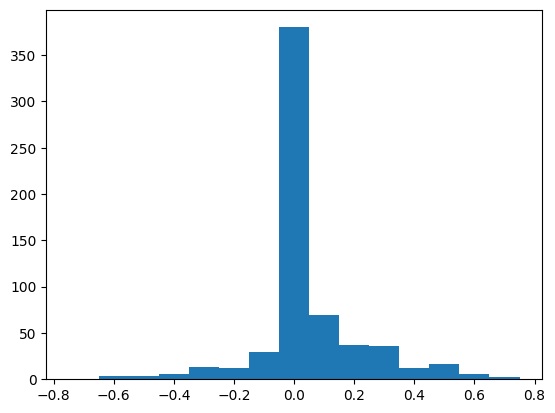

In [7]:
ents = np.c_[ent_early, ent_late]

import matplotlib.pyplot as plt

diff = ents[:,1] - ents[:,0]
diff.shape
bins = [-0.75 + 0.1 * i for i in range(16)]

plt.hist(diff, bins=bins)

In [8]:
pred_early = np.load(f"earlyPred_{model}_{dataset}_{model_dir}.npy")
pred_late = np.load(f"latePred_{model}_{dataset}_{model_dir}.npy")

In [9]:
no_change = pred_early.squeeze() == pred_late.squeeze()
print("Number of data points", len(no_change), "no change between early and late", f"{no_change.sum() / len(no_change):.2f}")



Number of data points 624 no change between early and late 0.92


(array([  0.,   3.,   3.,   6.,   8.,   9.,  24., 374.,  66.,  30.,  27.,
         11.,  11.,   3.,   0.]),
 array([-0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,
         0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75]),
 <BarContainer object of 15 artists>)

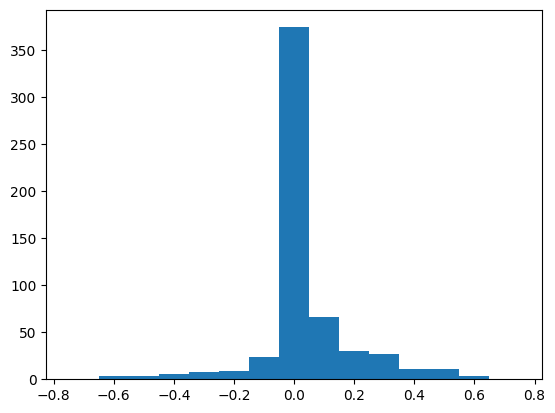

In [13]:
plt.hist(diff[no_change], bins=bins)

(array([0., 0., 0., 0., 5., 3., 5., 6., 3., 7., 9., 1., 5., 3., 2.]),
 array([-0.75, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,
         0.15,  0.25,  0.35,  0.45,  0.55,  0.65,  0.75]),
 <BarContainer object of 15 artists>)

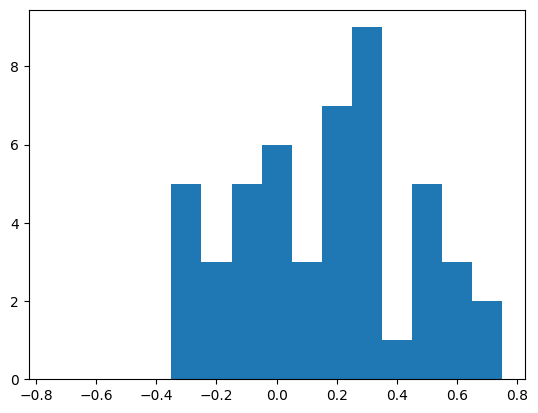

In [14]:
plt.hist(diff[~no_change], bins=bins)